In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
# SOM 클래스 정의
class SOM:
    def __init__(self, width, height, input_dim):
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.weights = np.random.rand(height, width, input_dim)
        self.learning_rate = 0.02
        self.radius = max(width, height)/2
    def _find_bmu(self, input_vec):
        distance = np.sum((self.weights - input_vec)**2, axis=2)
        return np.unravel_index(distance.argmin(), distance.shape)

    def _update_weights(self, input_vec, bmu, iteration, total_iterations):
        learning_rate = self.learning_rate * np.exp(-iteration/total_iterations)
        radius_decay = self.radius * np.exp(-iteration/total_iterations)
        for x in range(self.width):
            for y in range(self.height):
                dist_to_bmu = np.sqrt((x-bmu[1])**2 + (y-bmu[0])**2)
                if dist_to_bmu <= radius_decay:
                    influence = np.exp(-dist_to_bmu**2 / (2*(radius_decay**2)))
                    self.weights[y,x,:] += learning_rate * influence * (input_vec - self.weights[y,x,:])
    
    def train(self, data, num_iterations):
        weight_maps = []
        for i in range(num_iterations):
            for input_vec in data:
                bmu = self._find_bmu(input_vec)
                self._update_weights(input_vec, bmu, i, num_iterations)
            weight_maps.append(np.copy(self.weights))
        return weight_maps

In [3]:
# SOM 객체 생성 및 학습 데이터 준비
som = SOM(20, 20, 3)
data = np.random.rand(100,3)
num_iterations = 20

In [4]:
# 학습 실행 및 가중치 기록
weight_maps = som.train(data, num_iterations)

In [8]:
# 가중치 변화 시각화를 위한 애니메이션 함수 정의
def animate(i):
    plt.imshow(weight_maps[i])
    plt.title(f'Iterations: {i+1}')
    plt.axis('off')

<IPython.core.display.Javascript object>


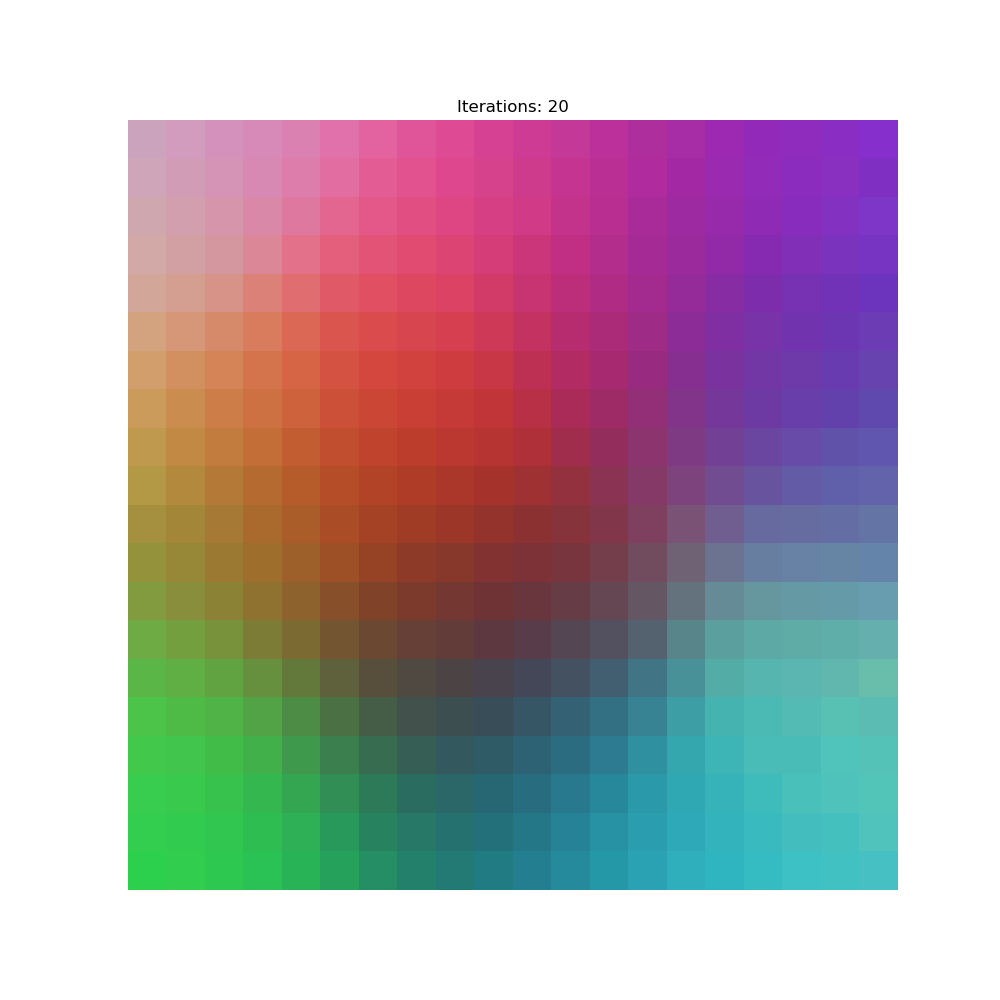

In [9]:
# 애니메이션 생성 및 표시
fig = plt.figure(figsize=(10,10))
ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=100, repeat=False)
plt.show()